# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [213]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

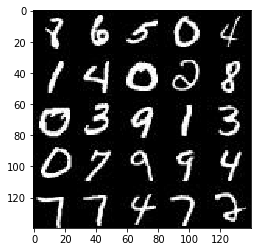

In [214]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

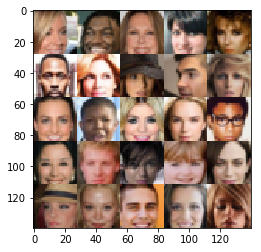

In [215]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [216]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/Users/mark/anaconda/envs/tf11_py35/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [217]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name="inputs_real")
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="inputs_z")
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")
    
    return inputs_real, inputs_z, learning_rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [218]:
def discriminator(images, reuse=False, alpha=0.1):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    
    kernal_init = tf.random_normal_initializer(stddev=0.02)
    
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # input is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer=kernal_init)
        x1 = tf.maximum(x1 * alpha, x1)
        
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='same', kernel_initializer=kernal_init)
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(x2 * alpha, x2)
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same', kernel_initializer=kernal_init)
        x3 = tf.layers.batch_normalization(x2, training=True)
        x3 = tf.maximum(x3 * alpha, x3)
        
        flat = tf.reshape(x3, (-1, 4*4*256))
        
        logits = tf.layers.dense(flat, 1)
        drop_logits = tf.layers.dropout(logits, rate=0.1)
        out = tf.sigmoid(drop_logits)
        
    return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [219]:
def generator(z, out_channel_dim, is_train=True, alpha=0.1):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    kernal_init = tf.random_normal_initializer(stddev=0.02)
    reuse = (not is_train)
    
    with tf.variable_scope('generator', reuse=reuse):
        
        x1 = tf.layers.dense(z, 7*7*256)
        
        x1 = tf.reshape(x1, (-1,7,7,256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(x1 * alpha, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same', kernel_initializer=kernal_init)
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(x2 * alpha, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same', kernel_initializer=kernal_init)
        x3 = tf.layers.batch_normalization(x2, training=is_train)
        x3 = tf.maximum(x3 * alpha, x3)
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same', kernel_initializer=kernal_init)
        out = tf.tanh(logits)
        
    return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [220]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, alpha=alpha, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)
    
    
    #TODO : One sided smoothing
    d_real_labels = tf.ones_like(d_model_real) * (1 - 0.1)
    d_fake_labels = tf.zeros_like(d_model_fake)
    g_labels = tf.ones_like(d_model_fake)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=d_real_labels))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=d_fake_labels))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=g_labels))
    
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [221]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """

    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    d_updates = [opt for opt in update_ops if opt.name.startswith('discriminator')]
    g_updates = [opt for opt in update_ops if opt.name.startswith('generator')]

    with tf.control_dependencies(d_updates):
        d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)

    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
            
    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [222]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [223]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, learn_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    step = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                step += 1
                
                batch_images = batch_images*2
                batch_z = np.random.uniform(-1,1,size=(batch_size,z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
#                 _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z})
                
                if step % 25 == 0:
                    train_loss_d = d_loss.eval(feed_dict={input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval(feed_dict={input_z: batch_z})
                    
                    print("Epoch: {}/{}...".format(epoch_i+1, epoch_count),
                          "D Loss: {:.4f}".format(train_loss_d),
                          "G Loss: {:.4f}".format(train_loss_g))
#                     print('here')
                    
                if step % 100 == 0:
                    show_generator_output(sess, batch_size, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch: 1/2... D Loss: 2.8852 G Loss: 0.1240
Epoch: 1/2... D Loss: 2.1486 G Loss: 0.2496
Epoch: 1/2... D Loss: 2.3311 G Loss: 0.2011
Epoch: 1/2... D Loss: 2.1126 G Loss: 0.2553


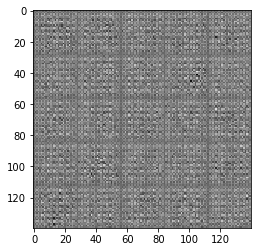

Epoch: 1/2... D Loss: 2.0240 G Loss: 0.2686
Epoch: 1/2... D Loss: 1.8621 G Loss: 0.3255
Epoch: 1/2... D Loss: 1.6441 G Loss: 0.4126
Epoch: 1/2... D Loss: 1.3354 G Loss: 0.5936


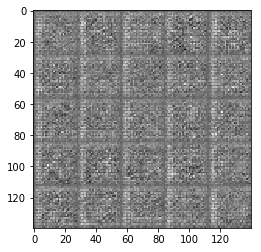

Epoch: 1/2... D Loss: 1.2284 G Loss: 0.6549
Epoch: 1/2... D Loss: 1.1589 G Loss: 0.7288
Epoch: 1/2... D Loss: 1.0588 G Loss: 0.8699
Epoch: 1/2... D Loss: 1.0355 G Loss: 1.0031


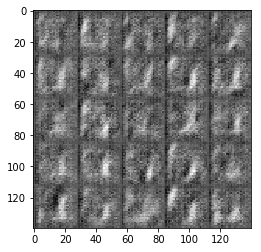

Epoch: 1/2... D Loss: 0.9562 G Loss: 1.0701
Epoch: 1/2... D Loss: 0.9750 G Loss: 1.1044
Epoch: 1/2... D Loss: 1.0567 G Loss: 0.9373
Epoch: 1/2... D Loss: 1.0853 G Loss: 0.9727


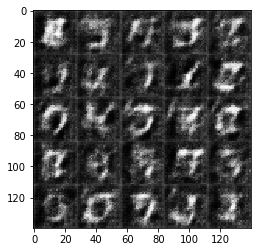

Epoch: 1/2... D Loss: 1.1095 G Loss: 0.9023
Epoch: 1/2... D Loss: 1.0861 G Loss: 0.9375
Epoch: 1/2... D Loss: 1.1519 G Loss: 0.9240
Epoch: 1/2... D Loss: 1.1502 G Loss: 0.9312


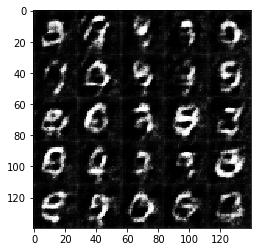

Epoch: 1/2... D Loss: 1.1276 G Loss: 0.9395
Epoch: 1/2... D Loss: 1.0864 G Loss: 0.9394
Epoch: 1/2... D Loss: 1.1791 G Loss: 0.8777
Epoch: 1/2... D Loss: 1.0801 G Loss: 1.0152


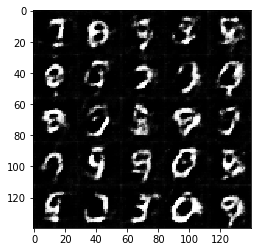

Epoch: 1/2... D Loss: 1.1253 G Loss: 0.9175
Epoch: 1/2... D Loss: 1.1236 G Loss: 0.9405
Epoch: 1/2... D Loss: 1.2167 G Loss: 0.8184
Epoch: 1/2... D Loss: 1.1901 G Loss: 0.9225


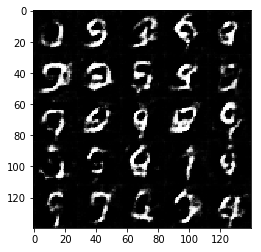

Epoch: 1/2... D Loss: 1.1723 G Loss: 0.8605
Epoch: 1/2... D Loss: 1.1879 G Loss: 0.9111
Epoch: 1/2... D Loss: 1.0756 G Loss: 0.9340
Epoch: 1/2... D Loss: 1.1879 G Loss: 0.8930


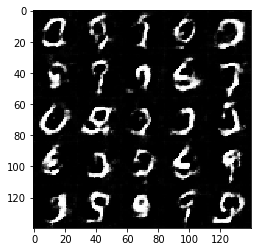

Epoch: 1/2... D Loss: 1.1656 G Loss: 0.9499
Epoch: 1/2... D Loss: 1.1593 G Loss: 0.8815
Epoch: 1/2... D Loss: 1.0946 G Loss: 0.9362
Epoch: 1/2... D Loss: 1.1220 G Loss: 0.9456


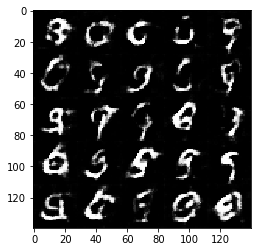

Epoch: 1/2... D Loss: 1.1409 G Loss: 0.8667
Epoch: 1/2... D Loss: 1.1225 G Loss: 0.9034
Epoch: 1/2... D Loss: 1.1216 G Loss: 1.0120
Epoch: 1/2... D Loss: 1.1706 G Loss: 0.8267


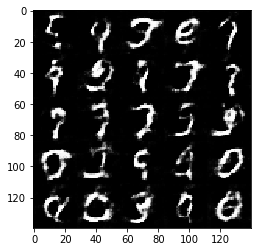

Epoch: 1/2... D Loss: 1.1886 G Loss: 0.7981
Epoch: 1/2... D Loss: 1.0932 G Loss: 0.9320
Epoch: 1/2... D Loss: 1.1023 G Loss: 1.0343
Epoch: 1/2... D Loss: 1.1229 G Loss: 0.8720


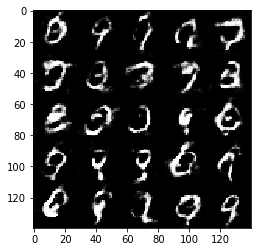

Epoch: 1/2... D Loss: 1.1190 G Loss: 0.9601
Epoch: 1/2... D Loss: 1.1956 G Loss: 0.8225
Epoch: 1/2... D Loss: 1.1433 G Loss: 0.9097
Epoch: 1/2... D Loss: 1.1510 G Loss: 0.8491


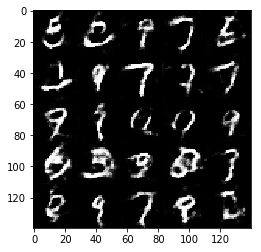

Epoch: 1/2... D Loss: 1.1042 G Loss: 0.9341
Epoch: 1/2... D Loss: 1.1319 G Loss: 0.9247
Epoch: 1/2... D Loss: 1.2054 G Loss: 0.8211
Epoch: 1/2... D Loss: 1.3001 G Loss: 0.7344


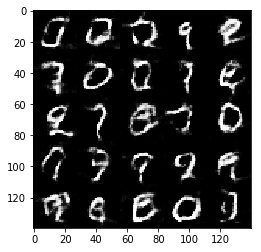

Epoch: 1/2... D Loss: 1.1567 G Loss: 0.8652
Epoch: 1/2... D Loss: 1.1639 G Loss: 0.8598
Epoch: 1/2... D Loss: 1.1326 G Loss: 0.9386
Epoch: 1/2... D Loss: 1.1694 G Loss: 0.8525


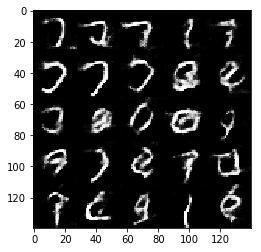

Epoch: 1/2... D Loss: 1.0961 G Loss: 0.9911
Epoch: 1/2... D Loss: 1.1654 G Loss: 0.8388
Epoch: 1/2... D Loss: 1.2588 G Loss: 0.8745
Epoch: 1/2... D Loss: 1.1477 G Loss: 0.8946


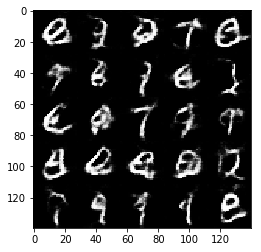

Epoch: 1/2... D Loss: 1.2190 G Loss: 0.9623
Epoch: 1/2... D Loss: 1.2782 G Loss: 0.7777
Epoch: 1/2... D Loss: 1.2516 G Loss: 0.8465
Epoch: 1/2... D Loss: 1.1839 G Loss: 1.0205


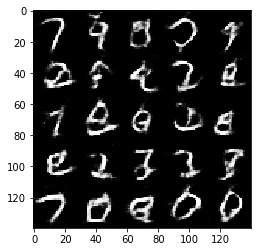

Epoch: 1/2... D Loss: 1.2437 G Loss: 0.8475
Epoch: 1/2... D Loss: 1.1885 G Loss: 0.8260
Epoch: 1/2... D Loss: 1.1451 G Loss: 0.8882
Epoch: 1/2... D Loss: 1.2237 G Loss: 0.7804


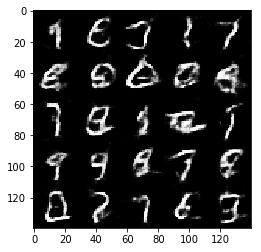

Epoch: 1/2... D Loss: 1.1182 G Loss: 0.8654
Epoch: 1/2... D Loss: 1.2226 G Loss: 0.8452
Epoch: 1/2... D Loss: 1.1710 G Loss: 0.8821
Epoch: 1/2... D Loss: 1.2131 G Loss: 0.8569


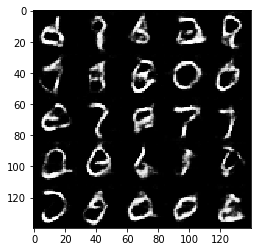

Epoch: 1/2... D Loss: 1.1677 G Loss: 0.9608
Epoch: 1/2... D Loss: 1.2098 G Loss: 0.8205
Epoch: 1/2... D Loss: 1.2684 G Loss: 0.8263
Epoch: 2/2... D Loss: 1.2693 G Loss: 0.8028


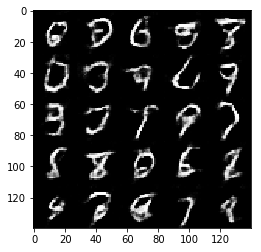

Epoch: 2/2... D Loss: 1.2569 G Loss: 0.7371
Epoch: 2/2... D Loss: 1.2430 G Loss: 0.8527
Epoch: 2/2... D Loss: 1.1699 G Loss: 0.9236
Epoch: 2/2... D Loss: 1.2188 G Loss: 0.7927


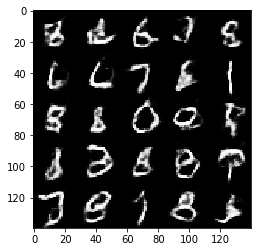

Epoch: 2/2... D Loss: 1.1400 G Loss: 0.8987
Epoch: 2/2... D Loss: 1.1795 G Loss: 0.9469
Epoch: 2/2... D Loss: 1.1641 G Loss: 1.0067
Epoch: 2/2... D Loss: 1.2644 G Loss: 0.8161


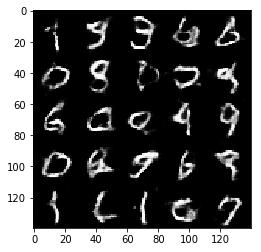

Epoch: 2/2... D Loss: 1.3071 G Loss: 0.7069
Epoch: 2/2... D Loss: 1.2303 G Loss: 0.7572
Epoch: 2/2... D Loss: 1.2137 G Loss: 0.7560
Epoch: 2/2... D Loss: 1.1770 G Loss: 0.8949


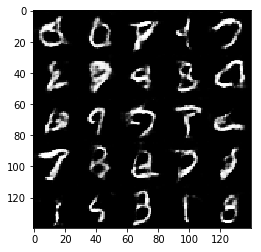

Epoch: 2/2... D Loss: 1.2568 G Loss: 0.8378
Epoch: 2/2... D Loss: 1.2118 G Loss: 0.7357
Epoch: 2/2... D Loss: 1.1769 G Loss: 0.8119
Epoch: 2/2... D Loss: 1.1621 G Loss: 0.9738


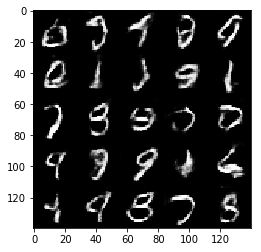

Epoch: 2/2... D Loss: 1.1754 G Loss: 0.8408
Epoch: 2/2... D Loss: 1.2293 G Loss: 0.9808
Epoch: 2/2... D Loss: 1.2285 G Loss: 0.7465
Epoch: 2/2... D Loss: 1.1844 G Loss: 0.9710


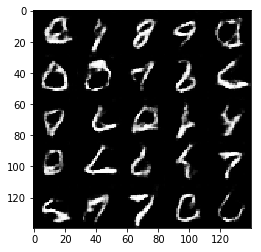

Epoch: 2/2... D Loss: 1.1579 G Loss: 0.8514
Epoch: 2/2... D Loss: 1.2165 G Loss: 0.8502
Epoch: 2/2... D Loss: 1.1601 G Loss: 0.8439
Epoch: 2/2... D Loss: 1.1856 G Loss: 0.9157


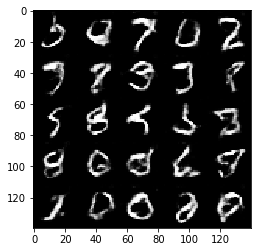

Epoch: 2/2... D Loss: 1.1631 G Loss: 0.9146
Epoch: 2/2... D Loss: 1.1657 G Loss: 0.9206
Epoch: 2/2... D Loss: 1.1612 G Loss: 0.9163
Epoch: 2/2... D Loss: 1.1920 G Loss: 0.8459


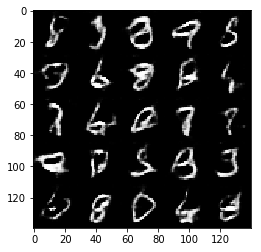

Epoch: 2/2... D Loss: 1.1408 G Loss: 0.9293
Epoch: 2/2... D Loss: 1.1586 G Loss: 0.8282
Epoch: 2/2... D Loss: 1.3089 G Loss: 1.0206
Epoch: 2/2... D Loss: 1.1432 G Loss: 0.9351


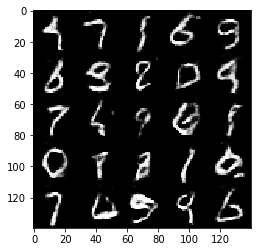

Epoch: 2/2... D Loss: 1.1639 G Loss: 0.9956
Epoch: 2/2... D Loss: 1.1269 G Loss: 1.0217
Epoch: 2/2... D Loss: 1.1689 G Loss: 0.9002
Epoch: 2/2... D Loss: 1.0709 G Loss: 1.0063


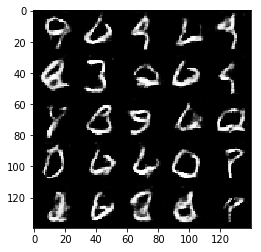

Epoch: 2/2... D Loss: 1.1275 G Loss: 0.8850
Epoch: 2/2... D Loss: 1.2567 G Loss: 0.8469
Epoch: 2/2... D Loss: 1.0747 G Loss: 0.9584
Epoch: 2/2... D Loss: 1.1257 G Loss: 0.9656


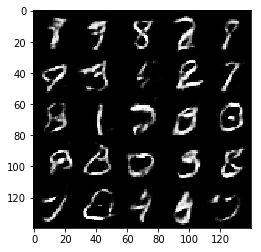

Epoch: 2/2... D Loss: 1.1106 G Loss: 0.9332
Epoch: 2/2... D Loss: 1.2158 G Loss: 0.9154
Epoch: 2/2... D Loss: 1.0863 G Loss: 0.8525
Epoch: 2/2... D Loss: 1.1520 G Loss: 0.8903


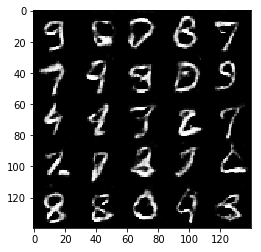

Epoch: 2/2... D Loss: 1.1765 G Loss: 1.0339
Epoch: 2/2... D Loss: 1.1463 G Loss: 0.9144
Epoch: 2/2... D Loss: 1.1333 G Loss: 0.9608
Epoch: 2/2... D Loss: 1.2041 G Loss: 0.7820


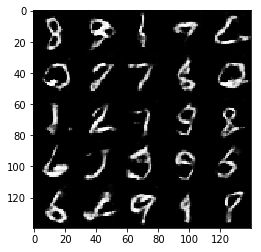

Epoch: 2/2... D Loss: 1.0993 G Loss: 1.0376
Epoch: 2/2... D Loss: 1.1358 G Loss: 0.8998
Epoch: 2/2... D Loss: 1.0914 G Loss: 0.9438
Epoch: 2/2... D Loss: 1.0677 G Loss: 0.9843


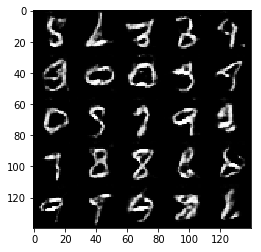

Epoch: 2/2... D Loss: 1.1347 G Loss: 0.9213
Epoch: 2/2... D Loss: 1.0742 G Loss: 0.9676
Epoch: 2/2... D Loss: 1.1549 G Loss: 0.7668
Epoch: 2/2... D Loss: 1.1415 G Loss: 1.0526


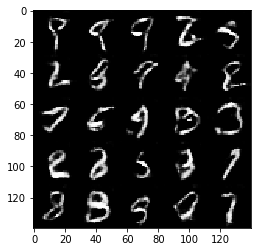

Epoch: 2/2... D Loss: 1.2342 G Loss: 0.7812
Epoch: 2/2... D Loss: 1.0951 G Loss: 0.9068
Epoch: 2/2... D Loss: 1.1205 G Loss: 1.0589
Epoch: 2/2... D Loss: 1.1894 G Loss: 0.8333


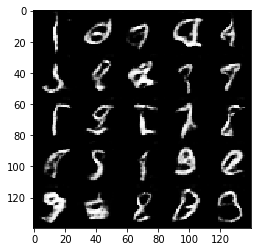

Epoch: 2/2... D Loss: 1.1116 G Loss: 1.1401
Epoch: 2/2... D Loss: 1.2257 G Loss: 0.9709
Epoch: 2/2... D Loss: 1.1309 G Loss: 0.9454
Epoch: 2/2... D Loss: 1.1474 G Loss: 0.8149


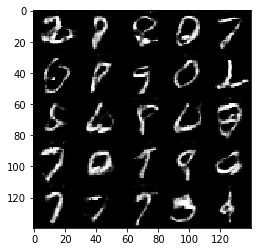

Epoch: 2/2... D Loss: 1.1568 G Loss: 0.9314
Epoch: 2/2... D Loss: 1.3252 G Loss: 0.9257
Epoch: 2/2... D Loss: 1.2861 G Loss: 0.5861
Epoch: 2/2... D Loss: 1.0325 G Loss: 1.0709


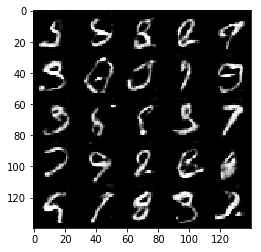

Epoch: 2/2... D Loss: 1.0597 G Loss: 0.9653
Epoch: 2/2... D Loss: 1.0740 G Loss: 0.9358
Epoch: 2/2... D Loss: 1.0288 G Loss: 0.9876
Epoch: 2/2... D Loss: 1.0408 G Loss: 0.9770


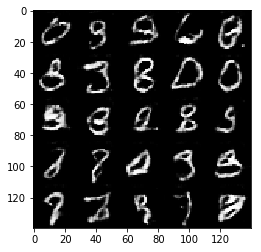

Epoch: 2/2... D Loss: 1.1133 G Loss: 0.8826
Epoch: 2/2... D Loss: 1.0848 G Loss: 0.9732


In [225]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch: 1/1... D Loss: 3.1850 G Loss: 0.0908
Epoch: 1/1... D Loss: 2.5521 G Loss: 0.1826
Epoch: 1/1... D Loss: 2.0779 G Loss: 0.2810
Epoch: 1/1... D Loss: 1.9362 G Loss: 0.3160


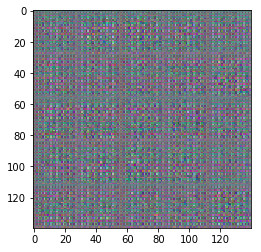

Epoch: 1/1... D Loss: 2.2216 G Loss: 0.2261
Epoch: 1/1... D Loss: 2.5283 G Loss: 0.1612
Epoch: 1/1... D Loss: 2.1680 G Loss: 0.2332
Epoch: 1/1... D Loss: 1.9842 G Loss: 0.2747


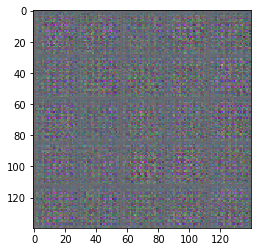

Epoch: 1/1... D Loss: 1.8896 G Loss: 0.3079
Epoch: 1/1... D Loss: 1.5491 G Loss: 0.4670
Epoch: 1/1... D Loss: 1.4610 G Loss: 0.5346
Epoch: 1/1... D Loss: 1.1401 G Loss: 0.7905


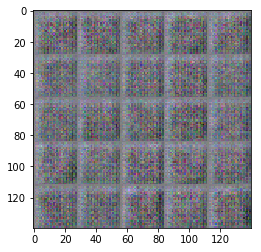

Epoch: 1/1... D Loss: 1.1031 G Loss: 0.7942
Epoch: 1/1... D Loss: 1.0506 G Loss: 0.9264
Epoch: 1/1... D Loss: 0.9132 G Loss: 1.0503
Epoch: 1/1... D Loss: 0.8763 G Loss: 1.0970


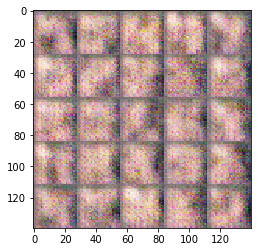

Epoch: 1/1... D Loss: 1.3780 G Loss: 0.9581
Epoch: 1/1... D Loss: 0.9665 G Loss: 1.0280
Epoch: 1/1... D Loss: 0.9905 G Loss: 1.0772
Epoch: 1/1... D Loss: 1.0818 G Loss: 1.0303


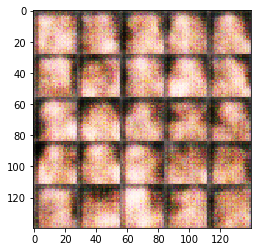

Epoch: 1/1... D Loss: 1.0622 G Loss: 0.9437
Epoch: 1/1... D Loss: 1.1684 G Loss: 0.8654
Epoch: 1/1... D Loss: 1.0697 G Loss: 0.8916
Epoch: 1/1... D Loss: 1.1569 G Loss: 0.8170


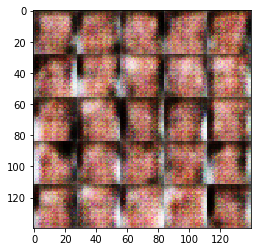

Epoch: 1/1... D Loss: 1.0310 G Loss: 1.1282
Epoch: 1/1... D Loss: 1.0355 G Loss: 0.9070
Epoch: 1/1... D Loss: 0.9656 G Loss: 1.1003
Epoch: 1/1... D Loss: 0.9061 G Loss: 1.2894


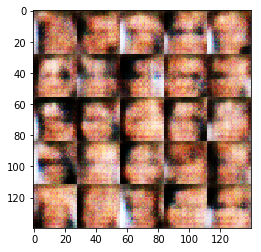

Epoch: 1/1... D Loss: 0.9541 G Loss: 1.4991
Epoch: 1/1... D Loss: 0.7567 G Loss: 1.6989
Epoch: 1/1... D Loss: 1.0429 G Loss: 1.0746
Epoch: 1/1... D Loss: 2.3893 G Loss: 1.6705


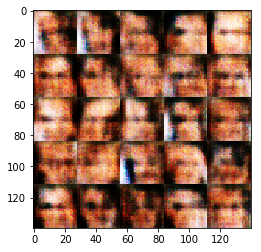

Epoch: 1/1... D Loss: 0.6936 G Loss: 1.5424
Epoch: 1/1... D Loss: 0.6184 G Loss: 2.1751
Epoch: 1/1... D Loss: 0.7005 G Loss: 1.6734
Epoch: 1/1... D Loss: 0.6534 G Loss: 2.3323


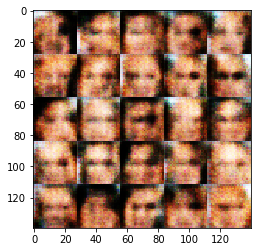

Epoch: 1/1... D Loss: 0.6360 G Loss: 1.9054
Epoch: 1/1... D Loss: 0.9476 G Loss: 2.5629
Epoch: 1/1... D Loss: 1.0948 G Loss: 0.8647
Epoch: 1/1... D Loss: 0.7730 G Loss: 1.2861


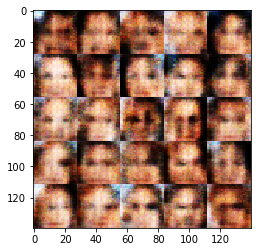

Epoch: 1/1... D Loss: 0.7720 G Loss: 1.4609
Epoch: 1/1... D Loss: 0.6001 G Loss: 2.5539
Epoch: 1/1... D Loss: 0.6310 G Loss: 3.2298
Epoch: 1/1... D Loss: 3.1098 G Loss: 1.5740


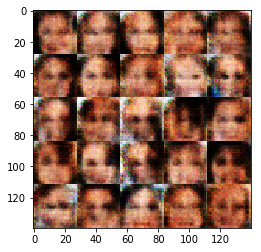

Epoch: 1/1... D Loss: 0.6061 G Loss: 3.0023
Epoch: 1/1... D Loss: 0.9692 G Loss: 1.0731
Epoch: 1/1... D Loss: 1.3105 G Loss: 0.7134
Epoch: 1/1... D Loss: 0.6042 G Loss: 2.2152


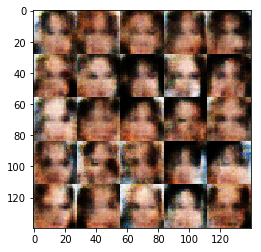

Epoch: 1/1... D Loss: 0.4997 G Loss: 4.0233
Epoch: 1/1... D Loss: 0.9348 G Loss: 1.0189
Epoch: 1/1... D Loss: 0.7523 G Loss: 1.5129
Epoch: 1/1... D Loss: 0.6851 G Loss: 3.0808


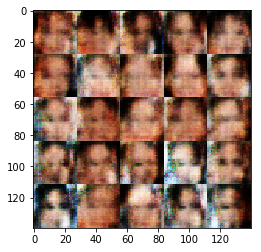

Epoch: 1/1... D Loss: 0.5145 G Loss: 3.9688
Epoch: 1/1... D Loss: 0.6832 G Loss: 1.5550
Epoch: 1/1... D Loss: 1.1051 G Loss: 1.0327
Epoch: 1/1... D Loss: 0.7809 G Loss: 1.9846


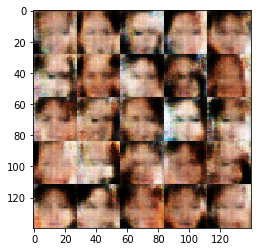

Epoch: 1/1... D Loss: 0.8815 G Loss: 2.6961
Epoch: 1/1... D Loss: 1.0657 G Loss: 1.0524
Epoch: 1/1... D Loss: 1.1752 G Loss: 0.9357
Epoch: 1/1... D Loss: 0.6252 G Loss: 2.6158


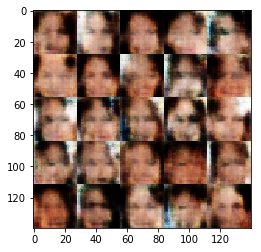

Epoch: 1/1... D Loss: 0.6831 G Loss: 2.0264
Epoch: 1/1... D Loss: 0.7015 G Loss: 2.5829
Epoch: 1/1... D Loss: 0.6411 G Loss: 2.1324
Epoch: 1/1... D Loss: 0.6274 G Loss: 1.9941


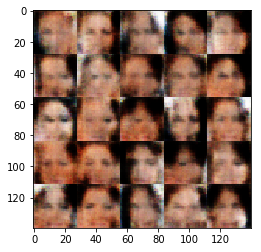

Epoch: 1/1... D Loss: 0.7537 G Loss: 1.8797
Epoch: 1/1... D Loss: 0.6981 G Loss: 2.0916
Epoch: 1/1... D Loss: 1.0045 G Loss: 1.2363
Epoch: 1/1... D Loss: 2.2827 G Loss: 1.1123


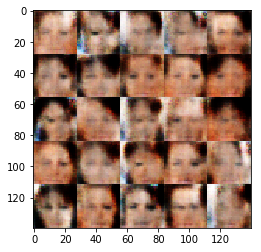

Epoch: 1/1... D Loss: 0.9517 G Loss: 1.2511
Epoch: 1/1... D Loss: 0.7715 G Loss: 1.7027
Epoch: 1/1... D Loss: 0.8336 G Loss: 1.3527
Epoch: 1/1... D Loss: 0.9301 G Loss: 1.0423


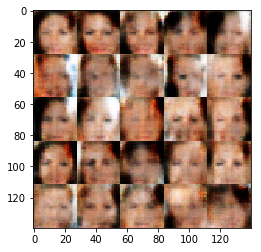

Epoch: 1/1... D Loss: 1.0971 G Loss: 1.0156
Epoch: 1/1... D Loss: 0.9166 G Loss: 1.6705
Epoch: 1/1... D Loss: 0.7991 G Loss: 1.7006
Epoch: 1/1... D Loss: 0.7151 G Loss: 2.0722


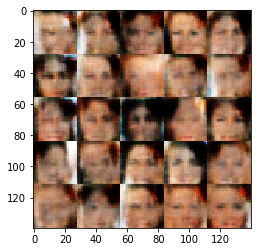

Epoch: 1/1... D Loss: 1.4053 G Loss: 0.7518
Epoch: 1/1... D Loss: 0.9823 G Loss: 1.1781
Epoch: 1/1... D Loss: 0.8526 G Loss: 1.5549
Epoch: 1/1... D Loss: 1.0263 G Loss: 0.9107


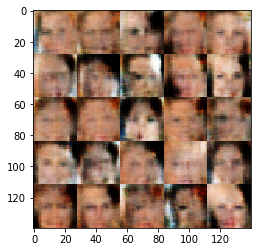

Epoch: 1/1... D Loss: 0.8537 G Loss: 1.5598
Epoch: 1/1... D Loss: 0.7574 G Loss: 1.5824
Epoch: 1/1... D Loss: 1.4361 G Loss: 0.8728
Epoch: 1/1... D Loss: 0.7766 G Loss: 1.5601


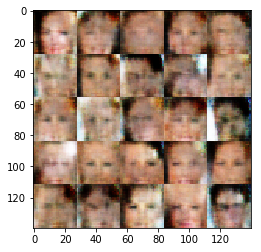

Epoch: 1/1... D Loss: 0.8050 G Loss: 1.8214
Epoch: 1/1... D Loss: 1.1295 G Loss: 1.2613
Epoch: 1/1... D Loss: 0.8706 G Loss: 1.7297
Epoch: 1/1... D Loss: 0.8943 G Loss: 1.5206


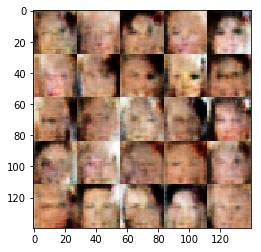

Epoch: 1/1... D Loss: 0.8951 G Loss: 1.8965
Epoch: 1/1... D Loss: 0.9516 G Loss: 1.1368
Epoch: 1/1... D Loss: 0.9410 G Loss: 1.0177
Epoch: 1/1... D Loss: 1.0677 G Loss: 1.2374


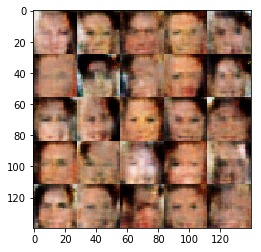

Epoch: 1/1... D Loss: 1.3036 G Loss: 1.2649
Epoch: 1/1... D Loss: 1.0100 G Loss: 1.2101
Epoch: 1/1... D Loss: 0.9131 G Loss: 2.0016
Epoch: 1/1... D Loss: 0.9746 G Loss: 1.1790


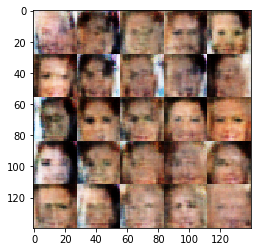

Epoch: 1/1... D Loss: 0.8350 G Loss: 1.7308
Epoch: 1/1... D Loss: 0.9159 G Loss: 1.4606
Epoch: 1/1... D Loss: 0.9238 G Loss: 1.1491
Epoch: 1/1... D Loss: 1.1300 G Loss: 1.2281


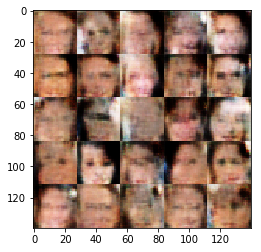

Epoch: 1/1... D Loss: 1.6215 G Loss: 0.7994
Epoch: 1/1... D Loss: 1.0226 G Loss: 0.9405
Epoch: 1/1... D Loss: 0.9109 G Loss: 1.5415
Epoch: 1/1... D Loss: 1.0408 G Loss: 1.2546


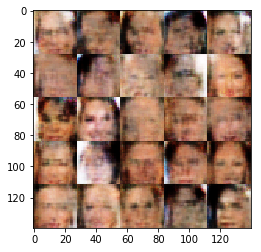

Epoch: 1/1... D Loss: 0.8921 G Loss: 1.4631
Epoch: 1/1... D Loss: 1.5464 G Loss: 1.0238
Epoch: 1/1... D Loss: 0.9301 G Loss: 1.5835
Epoch: 1/1... D Loss: 0.7750 G Loss: 2.1181


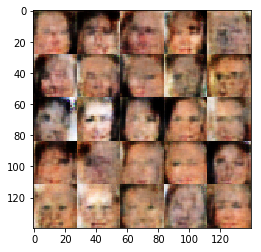

Epoch: 1/1... D Loss: 1.1366 G Loss: 2.0110
Epoch: 1/1... D Loss: 0.8491 G Loss: 1.5679
Epoch: 1/1... D Loss: 1.2490 G Loss: 0.8311
Epoch: 1/1... D Loss: 0.7321 G Loss: 1.9427


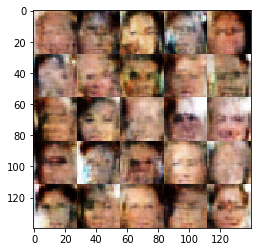

Epoch: 1/1... D Loss: 0.8113 G Loss: 1.5509
Epoch: 1/1... D Loss: 0.7977 G Loss: 1.6370
Epoch: 1/1... D Loss: 1.2326 G Loss: 0.8802
Epoch: 1/1... D Loss: 1.0832 G Loss: 1.5460


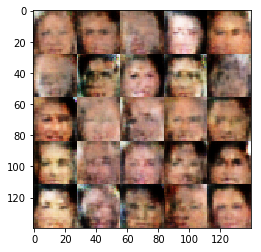

Epoch: 1/1... D Loss: 1.1915 G Loss: 1.0477
Epoch: 1/1... D Loss: 1.0534 G Loss: 1.2611
Epoch: 1/1... D Loss: 0.8365 G Loss: 1.4912
Epoch: 1/1... D Loss: 1.0727 G Loss: 1.3248


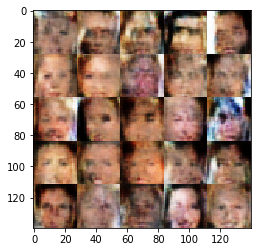

Epoch: 1/1... D Loss: 1.0483 G Loss: 1.0390
Epoch: 1/1... D Loss: 0.9449 G Loss: 1.3843
Epoch: 1/1... D Loss: 1.2606 G Loss: 0.7960
Epoch: 1/1... D Loss: 0.9787 G Loss: 1.2448


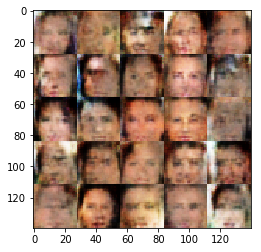

Epoch: 1/1... D Loss: 1.4455 G Loss: 0.8139
Epoch: 1/1... D Loss: 1.4864 G Loss: 0.8198
Epoch: 1/1... D Loss: 1.4391 G Loss: 0.7795
Epoch: 1/1... D Loss: 1.3955 G Loss: 0.8206


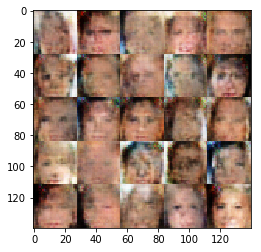

Epoch: 1/1... D Loss: 1.4288 G Loss: 0.8769
Epoch: 1/1... D Loss: 1.3928 G Loss: 0.9019
Epoch: 1/1... D Loss: 1.3854 G Loss: 0.8077
Epoch: 1/1... D Loss: 1.3984 G Loss: 0.7702


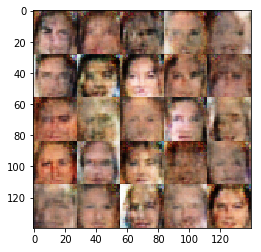

Epoch: 1/1... D Loss: 1.4109 G Loss: 0.8319
Epoch: 1/1... D Loss: 1.3547 G Loss: 0.8186
Epoch: 1/1... D Loss: 1.3545 G Loss: 0.8436
Epoch: 1/1... D Loss: 1.3672 G Loss: 0.8025


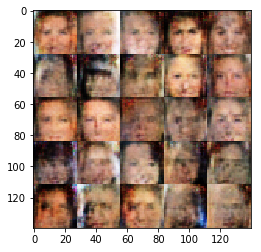

Epoch: 1/1... D Loss: 1.4056 G Loss: 0.8267
Epoch: 1/1... D Loss: 1.3389 G Loss: 0.8640
Epoch: 1/1... D Loss: 1.3968 G Loss: 0.7972
Epoch: 1/1... D Loss: 1.3818 G Loss: 0.8442


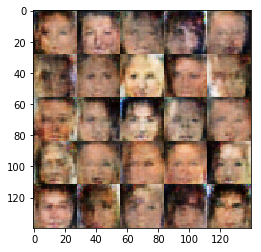

Epoch: 1/1... D Loss: 1.3085 G Loss: 0.8538
Epoch: 1/1... D Loss: 1.4154 G Loss: 0.7754
Epoch: 1/1... D Loss: 1.3861 G Loss: 0.8054
Epoch: 1/1... D Loss: 1.3573 G Loss: 0.8086


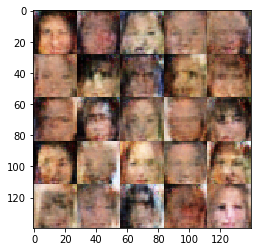

Epoch: 1/1... D Loss: 1.3276 G Loss: 0.8269
Epoch: 1/1... D Loss: 1.3678 G Loss: 0.8407
Epoch: 1/1... D Loss: 1.3394 G Loss: 0.8117
Epoch: 1/1... D Loss: 1.3797 G Loss: 0.7883


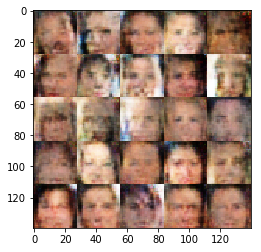

Epoch: 1/1... D Loss: 1.3770 G Loss: 0.7900
Epoch: 1/1... D Loss: 1.3503 G Loss: 0.9061
Epoch: 1/1... D Loss: 1.3478 G Loss: 0.8213
Epoch: 1/1... D Loss: 1.3976 G Loss: 0.8474


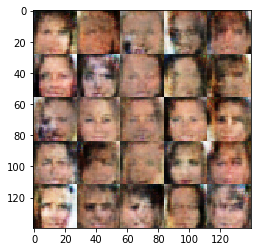

Epoch: 1/1... D Loss: 1.3103 G Loss: 0.7790
Epoch: 1/1... D Loss: 1.2479 G Loss: 1.0059
Epoch: 1/1... D Loss: 1.2557 G Loss: 0.8185
Epoch: 1/1... D Loss: 1.0669 G Loss: 1.2481


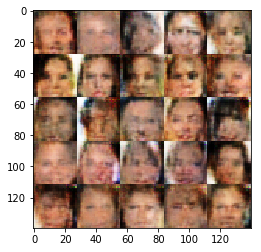

Epoch: 1/1... D Loss: 0.9258 G Loss: 1.3332
Epoch: 1/1... D Loss: 2.8105 G Loss: 1.2457
Epoch: 1/1... D Loss: 1.4220 G Loss: 0.7702
Epoch: 1/1... D Loss: 1.3507 G Loss: 0.8562


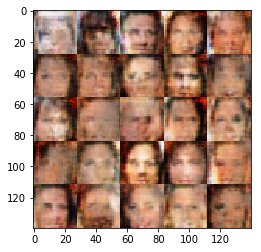

Epoch: 1/1... D Loss: 1.3889 G Loss: 0.8283
Epoch: 1/1... D Loss: 1.3200 G Loss: 0.8350
Epoch: 1/1... D Loss: 1.2843 G Loss: 0.8183
Epoch: 1/1... D Loss: 1.4252 G Loss: 0.7298


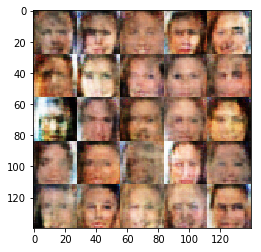

Epoch: 1/1... D Loss: 1.3757 G Loss: 0.7935
Epoch: 1/1... D Loss: 1.3627 G Loss: 0.7581
Epoch: 1/1... D Loss: 1.0748 G Loss: 1.2101
Epoch: 1/1... D Loss: 1.1782 G Loss: 0.8816


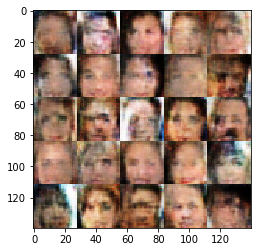

Epoch: 1/1... D Loss: 1.0289 G Loss: 1.1361
Epoch: 1/1... D Loss: 1.2064 G Loss: 1.0580
Epoch: 1/1... D Loss: 0.9304 G Loss: 1.5601
Epoch: 1/1... D Loss: 0.9574 G Loss: 1.1328


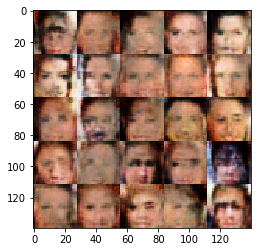

Epoch: 1/1... D Loss: 1.3279 G Loss: 0.7649
Epoch: 1/1... D Loss: 1.0738 G Loss: 0.8706
Epoch: 1/1... D Loss: 1.0676 G Loss: 0.9718
Epoch: 1/1... D Loss: 1.3754 G Loss: 0.8271


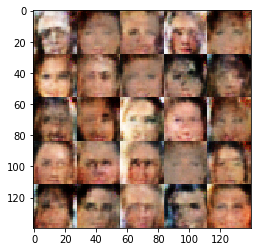

Epoch: 1/1... D Loss: 1.3963 G Loss: 0.8158
Epoch: 1/1... D Loss: 1.3590 G Loss: 0.9530
Epoch: 1/1... D Loss: 1.3595 G Loss: 0.8149
Epoch: 1/1... D Loss: 1.3195 G Loss: 0.8037


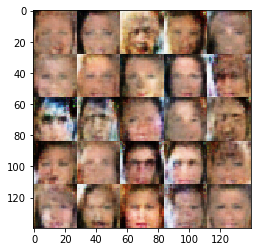

Epoch: 1/1... D Loss: 1.2632 G Loss: 0.8251
Epoch: 1/1... D Loss: 1.0076 G Loss: 1.4561
Epoch: 1/1... D Loss: 1.0694 G Loss: 1.2051
Epoch: 1/1... D Loss: 0.9258 G Loss: 1.6357


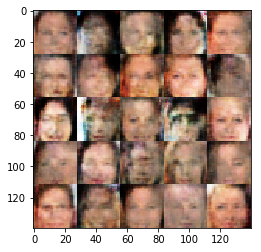

Epoch: 1/1... D Loss: 1.5289 G Loss: 0.7777
Epoch: 1/1... D Loss: 1.0262 G Loss: 0.9850
Epoch: 1/1... D Loss: 0.8536 G Loss: 2.0789
Epoch: 1/1... D Loss: 1.0470 G Loss: 1.0061


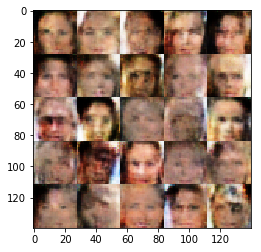

Epoch: 1/1... D Loss: 1.0237 G Loss: 1.4999
Epoch: 1/1... D Loss: 0.8408 G Loss: 1.7231
Epoch: 1/1... D Loss: 0.8969 G Loss: 1.3194
Epoch: 1/1... D Loss: 1.0750 G Loss: 0.8497


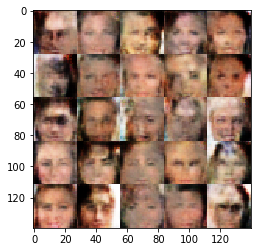

Epoch: 1/1... D Loss: 0.7985 G Loss: 1.4128
Epoch: 1/1... D Loss: 1.6236 G Loss: 1.0174
Epoch: 1/1... D Loss: 1.3868 G Loss: 0.8726
Epoch: 1/1... D Loss: 1.0413 G Loss: 1.1018


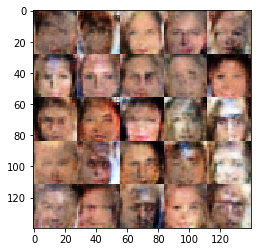

Epoch: 1/1... D Loss: 1.1079 G Loss: 0.7792
Epoch: 1/1... D Loss: 0.8772 G Loss: 1.2163
Epoch: 1/1... D Loss: 0.9788 G Loss: 1.4077
Epoch: 1/1... D Loss: 1.3807 G Loss: 0.8499


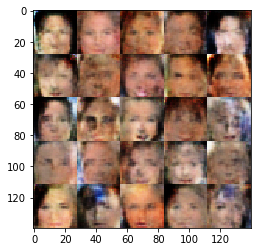

Epoch: 1/1... D Loss: 1.3998 G Loss: 0.8040
Epoch: 1/1... D Loss: 1.3406 G Loss: 0.8472
Epoch: 1/1... D Loss: 1.2689 G Loss: 0.9132
Epoch: 1/1... D Loss: 1.0942 G Loss: 1.1238


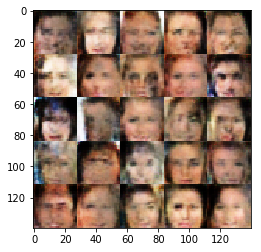

Epoch: 1/1... D Loss: 0.7392 G Loss: 1.6425
Epoch: 1/1... D Loss: 3.1056 G Loss: 1.3001
Epoch: 1/1... D Loss: 1.2442 G Loss: 0.7474
Epoch: 1/1... D Loss: 0.9309 G Loss: 1.0528


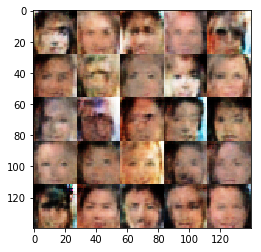

Epoch: 1/1... D Loss: 1.0917 G Loss: 1.0780
Epoch: 1/1... D Loss: 1.0575 G Loss: 1.3981
Epoch: 1/1... D Loss: 0.8471 G Loss: 1.5133
Epoch: 1/1... D Loss: 1.0840 G Loss: 1.3016


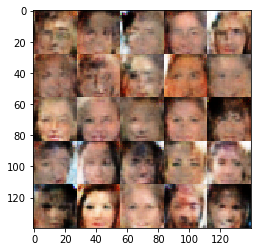

Epoch: 1/1... D Loss: 1.0359 G Loss: 1.2595
Epoch: 1/1... D Loss: 1.1714 G Loss: 1.1681
Epoch: 1/1... D Loss: 0.9228 G Loss: 2.0615
Epoch: 1/1... D Loss: 0.9102 G Loss: 1.7102


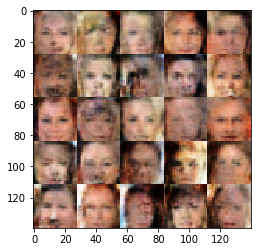

Epoch: 1/1... D Loss: 0.7775 G Loss: 1.9795
Epoch: 1/1... D Loss: 1.4663 G Loss: 0.8116
Epoch: 1/1... D Loss: 1.4321 G Loss: 0.8361
Epoch: 1/1... D Loss: 1.3159 G Loss: 0.8460


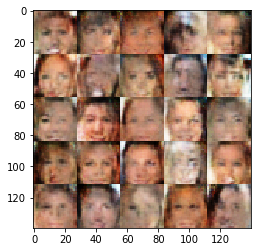

Epoch: 1/1... D Loss: 1.0436 G Loss: 1.2058
Epoch: 1/1... D Loss: 0.9427 G Loss: 1.2088
Epoch: 1/1... D Loss: 0.8013 G Loss: 1.8690
Epoch: 1/1... D Loss: 1.3969 G Loss: 0.9643


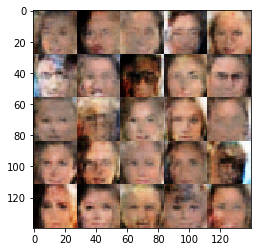

Epoch: 1/1... D Loss: 1.0916 G Loss: 1.0501
Epoch: 1/1... D Loss: 0.8000 G Loss: 1.5070
Epoch: 1/1... D Loss: 0.8901 G Loss: 1.2561
Epoch: 1/1... D Loss: 0.8901 G Loss: 2.1032


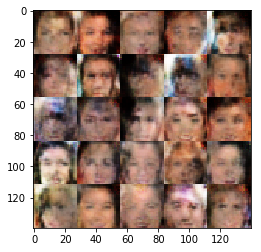

Epoch: 1/1... D Loss: 1.3395 G Loss: 0.6750
Epoch: 1/1... D Loss: 0.9645 G Loss: 1.1735
Epoch: 1/1... D Loss: 0.8530 G Loss: 1.5704
Epoch: 1/1... D Loss: 0.9244 G Loss: 1.3858


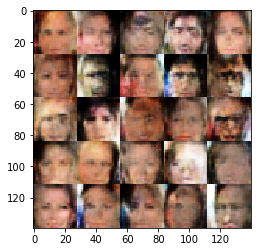

Epoch: 1/1... D Loss: 1.4478 G Loss: 0.6460
Epoch: 1/1... D Loss: 1.4344 G Loss: 0.9012
Epoch: 1/1... D Loss: 1.1107 G Loss: 0.9123
Epoch: 1/1... D Loss: 1.1986 G Loss: 0.8970


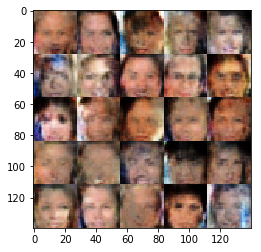

Epoch: 1/1... D Loss: 0.8732 G Loss: 1.3028
Epoch: 1/1... D Loss: 0.9098 G Loss: 1.7183
Epoch: 1/1... D Loss: 1.0101 G Loss: 1.5065
Epoch: 1/1... D Loss: 0.9316 G Loss: 1.1280


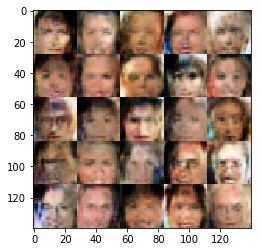

Epoch: 1/1... D Loss: 0.9481 G Loss: 1.4281
Epoch: 1/1... D Loss: 1.0915 G Loss: 1.8841
Epoch: 1/1... D Loss: 1.0912 G Loss: 1.0599
Epoch: 1/1... D Loss: 0.7844 G Loss: 1.7472


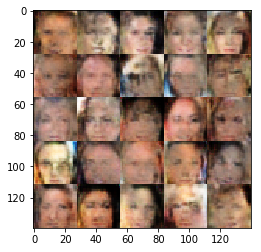

Epoch: 1/1... D Loss: 0.9628 G Loss: 1.3709
Epoch: 1/1... D Loss: 0.9562 G Loss: 1.0810
Epoch: 1/1... D Loss: 0.9496 G Loss: 1.2257
Epoch: 1/1... D Loss: 0.9809 G Loss: 1.3999


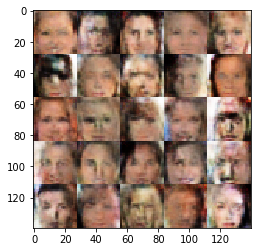

Epoch: 1/1... D Loss: 1.0076 G Loss: 1.0368
Epoch: 1/1... D Loss: 0.9116 G Loss: 1.1025
Epoch: 1/1... D Loss: 0.8225 G Loss: 2.0161
Epoch: 1/1... D Loss: 0.9488 G Loss: 1.1935


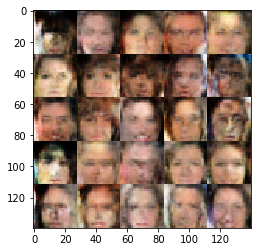

Epoch: 1/1... D Loss: 0.9021 G Loss: 1.8388


In [224]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.